# Fourier Optics

### Algherbawi, Nader | 6XXXXX

### Mintzer, Benjamin Isaac Joseph | 626451

In [9]:
# importing packages and modules
from scipy import optimize
import numpy as np
import math as math
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
from scipy import stats 
from scipy.stats import chisquare
from termcolor import colored
from numpy import arange
from matplotlib import pyplot
from scipy.stats import chi2
import numpy as npqw3
import csv
import RigolWFM.wfm as rigol
from scipy.optimize import curve_fit
import cv2

### 3.1 Report Task

Report Task: Determine the pixel pitch of the SLM by investigating the
separation of the diffraction orders according to Equation 1. Estimate and
calculate your uncertainties. Compare to the real value of the pixel size.

Equation 1: \
$p sin(\theta)_{m} = m \lambda$

In [6]:
lambda_nm = 532
lambda_mm = lambda_nm*(10**(-6))
m = 1
D_m = 7 #mm
D_mirror = 175+160+94 #mm
sin_theta = D_m/D_mirror
u_sys_sin_theta = .05
u_p = np.sqrt((lambda_mm**2)*((u_sys_sin_theta/D_mirror)**2+(-(D_m*u_sys_sin_theta)/(D_mirror**2))**2))


'''
theta_deg = 
theta_rad = theta_deg*(np.pi/180)
'''

p = (m*lambda_mm)/(sin_theta)
p_literature = 35 #μm


print('pixel pitch = ', p*10**3, '±', u_p, 'μm')
print('pixel pitch (literature) = ', p_literature, 'μm')

pixel pitch =  32.604 ± 6.201291567160808e-08 μm
pixel pitch (literature) =  35 μm


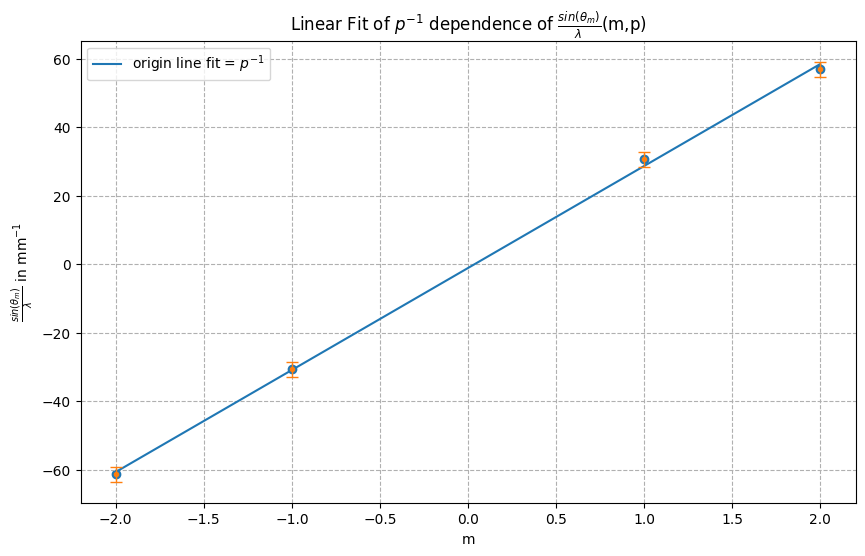

33.562941176399846 +- 0.6529352613123574 µm


In [37]:
def linear_fit(x_data, y_data):
    f_1=lambda x,slope,b: (slope*x) + b
    K1A1_1,K2A1_1=sp.optimize.curve_fit(f_1, x_data, y_data)
    slope = K1A1_1[0]
    uncertainty_slope = (K2A1_1[0][0])**0.5
    y_intercept = K1A1_1[1]
    uncertainty_intercept = (K2A1_1[1][1])**0.5
    #x_plot = np.array(range(int(max(x_data)+30.0)))
    x_plot = np.linspace(min(x_data), max(x_data), 100)
    y_plot = K1A1_1[0]*x_plot + y_intercept
    return x_plot, y_plot, slope, uncertainty_slope

def scatter_plot(x_axis, y_axis, title, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.scatter(x_axis,y_axis)
    plt.grid(axis='both', linestyle='--')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

m = [-2,-1,1,2]
d = [-14,-7,7,13] #mm
u_d = .5 # mm
u_D = 0.5  # mm



sin_theta = np.multiply(d,1/D_mirror)
y = np.multiply(sin_theta,1/lambda_mm)
u_sin = np.abs(sin_theta) * np.sqrt((np.multiply(u_d,1/np.array(d)))**2 + (u_d/D_mirror)**2)
u_y = u_sin/lambda_mm

# (sin_theta)/lambda_mm = m/p

x_plot, y_plot, slope, uncertainty_slope = linear_fit(m, y)
scatter_plot(m,y,"Linear Fit of $p^{-1}$ dependence of $\\frac{sin(\\theta _{m})}{\lambda}$(m,p)","m","$\\frac{sin(\\theta _{m})}{\lambda}$ in mm$^{-1}$")
plt.plot(x_plot, y_plot, label="origin line fit = $p^{-1}$")
plt.errorbar(m, y, yerr=u_y,  fmt=".",capsize=4, elinewidth=1) 
plt.legend()
plt.savefig('3.1 Pixel Pitch.png', dpi=800)
plt.show() 

p = 1 / slope
uncertainty_p = uncertainty_slope / slope**2

print(p*1000,"+-",uncertainty_p*1000,"µm")








### 3.2 Report Task

Plot the curve that you saved from the oscilloscope and
convert the curve to useful units (Relative intensity and gray value). Describe
the whole procedure that the outgoing light intensity changes when the gray
value varies.

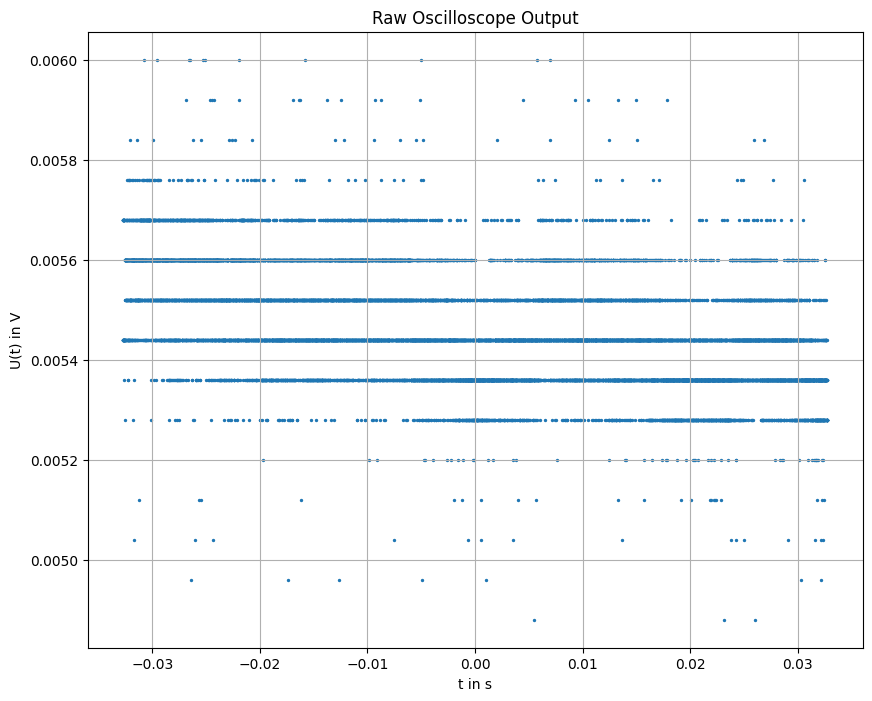

NameError: name 'x_data' is not defined

In [3]:
filename = '/Users/BIJM/Notebooks/F-Praktikum/Fourier Optics/Mintzer and Algherbawi/NewFile1.wfm'
scope = 'DS1102E'

w = rigol.Wfm.from_file(filename, scope)

# Extract time and voltage

# List all attributes/methods in the object
ch = w.channels[0]

# Extract time and voltage data
time = ch.times  # in seconds
voltage = ch.volts  # in volts

plt.figure(figsize=(10, 8))
plt.scatter(time, voltage, s=2)
plt.xlabel("t in s")
plt.ylabel("U(t) in V")
plt.title("Raw Oscilloscope Output")
plt.grid(True)
plt.show()


f_1=lambda x,slope,b: (slope*x) + b
K1A1_1,K2A1_1=scipy.optimize.curve_fit(f_1, x_data, y_data)
slope = K1A1_1[0]
uncertainty_slope = (K2A1_1[0][0])**0.5
y_intercept = K1A1_1[1]
uncertainty_intercept = (K2A1_1[1][1])**0.5
#x_plot = np.array(range(int(max(x_data)+30.0)))
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = K1A1_1[0]*x_plot + y_intercept
return x_plot, y_plot, slope, uncertainty_slope


#w.plot()
#plt.show()



### 4 Lab Task

In the ’Display Image’ part of the Lab GUI, enter the minimum
and maximum gray values to the optimum range. Tick the ’Scale gray Levels’
box and display an image of your choice. In order to see the image we need to
image the SLM plane onto the image plane where we have placed the screen
or the camera. Use the right distances according to the lens equation. How
does the image look like without a lens or when you use the wrong distances?
Record images with the camera.

### 4 Report Task

Describe what you have done and explain why we have to
use a lens even though the light is collimated.

Since the camera's detector is very small, a lens is used to focus all the light into the detector. When the position of the camera was moved away from the focal plane (f), the image blurred. To sharpen the image, we started by calculating the theoretical lens position ($z_{1}$) and camera position ($z_{2}$) using the manufactorer's focal plane  $f_{manufacture} = 100$ mm using the thin lens formula $\ref{eq:thin_lens}$. From there, we then adjusted the relative positions until the image came into focus.

\begin{equation}\label{eq:thin_lens}
    f = \frac{z_{1} \cdot z_{2}}{z_{1} + z_{2}}
\end{equation}


### 5.1 Report Task

Sketch the situation from Figure 6 and prove that a plane
wave is deflected with an angle $\theta_{x} = sin^{−1}(\lambda \nu x)$ by using interference arguments.

## 5.2 Imaging the Fourier Plane

### 5.2 Report Task

• Describe the Fourier transforms that you have taken and explain the
various shapes. Try to link structures in the Fourier transform with
structures in the images.

• Fourier transform the sample images using your favorite analysis software (Python, Matlab, Mathematica...) and compare to the optical Fourier transforms that you saved with the camera (the functions are called fft2 and fftshift). Describe any differences you can see. Visualize also the phase and magnitude of the Fourier transforms.

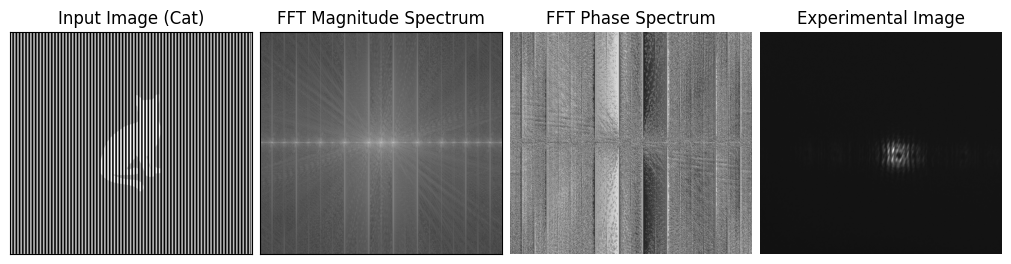

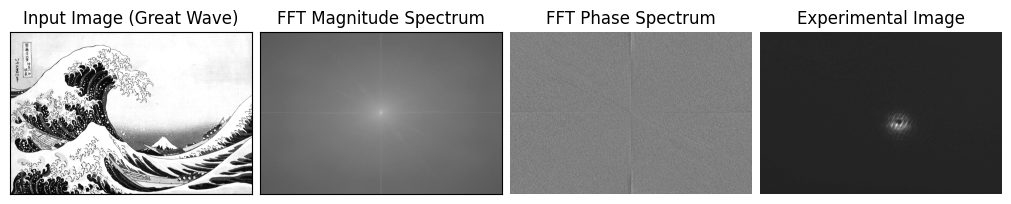

In [6]:
img = cv2.imread('Mintzer and Algherbawi/Cat.bmp',0)
exp_img = cv2.imread('Mintzer and Algherbawi/4 Cat 400 mm.jpg', 0)  # Grayscale
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize
exp_img = cv2.resize(exp_img, img.shape[::-1])

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)

plt.figure(figsize=(10, 4), constrained_layout=True)
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input Image (Cat)'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('FFT Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(phase_spectrum, cmap='gray')
plt.title('FFT Phase Spectrum')
plt.axis('off')
plt.subplot(144),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')
plt.savefig('5.2 FFT Cat.png', dpi=800)
plt.show()

img = cv2.imread('Mintzer and Algherbawi/GreatWaveOffKanagawa.bmp',0)
exp_img = cv2.imread('Mintzer and Algherbawi/4 Great Wave 400 mm.jpg', 0)  # Grayscale
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize
exp_img = cv2.resize(exp_img, img.shape[::-1])

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)

plt.figure(figsize=(10, 4), constrained_layout=True)
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input Image (Great Wave)'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('FFT Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(phase_spectrum, cmap='gray')
plt.title('FFT Phase Spectrum')
plt.axis('off')
plt.subplot(144),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')
plt.savefig('5.2 FFT Great Wave.png', dpi=800)
plt.show()

## 5.3 Spatial Filtering in the Fourier Plane

### Report Task

What is the cutoff frequency $\nu_{c}$ of a circular aperture with diameter D when doing Fourier filtering?

$\nu_{c} = \frac{D}{2\lambda f}$

### Report Task

Implement spatial filtering with different kind of filters in software (FFT and IFFT plus a mask) and compare the results to the images that we generated optically. Discuss any differences.

#### High-Pass Circular Filter

#### Great Wave

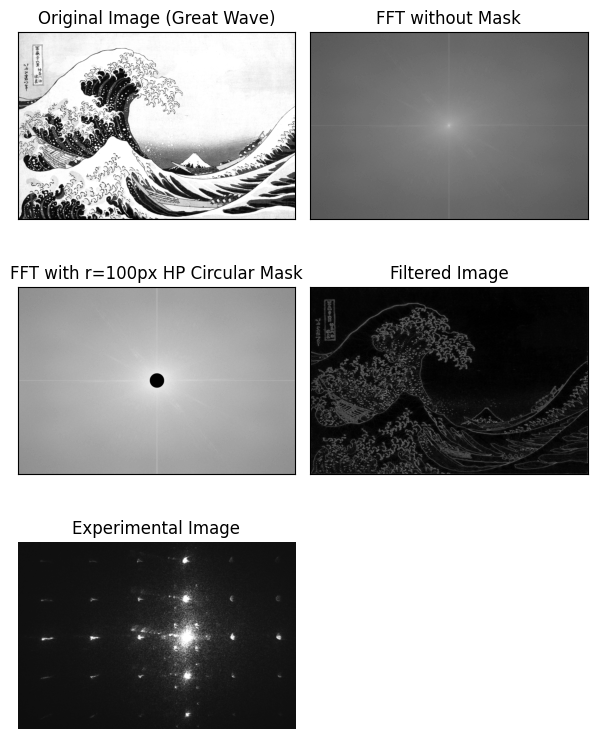

In [16]:
img = cv2.imread('Mintzer and Algherbawi/GreatWaveOffKanagawa.bmp',0)
exp_img = cv2.imread('Mintzer and Algherbawi/5. 2f system.200mm lens great wave high pass circular filter .jpg', 0)  # Grayscale
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize
exp_img = cv2.resize(exp_img, img.shape[::-1])

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))

#Create copy of fshift
fshift_original = fshift.copy()

#Create Cirular Mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
radius = 100

#fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# Apply mask
mask = np.ones((rows, cols), np.uint8)
Y, X = np.ogrid[:rows, :cols]
distance = (X - ccol)**2 + (Y - crow)**2
mask[distance <= radius**2] = 0

# Implement Mask
fshift_filtered = fshift * mask

# Inverse FFT
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# FFT magnitude images (log-scaled for visibility)
magnitude_original = 20 * np.log(np.abs(fshift_original) + 1)
magnitude_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)

# Plot
plt.figure(figsize=(6, 8))

plt.subplot(321), plt.imshow(img, cmap='gray')
plt.title('Original Image (Great Wave)'), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(magnitude_original, cmap='gray')
plt.title('FFT without Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(magnitude_filtered, cmap='gray')
plt.title('FFT with r=100px HP Circular Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(324), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('5.3 HP Circular Great Wave.png', dpi=800)
plt.show()

#### Low-Pass Circular Filter

#### Great Wave

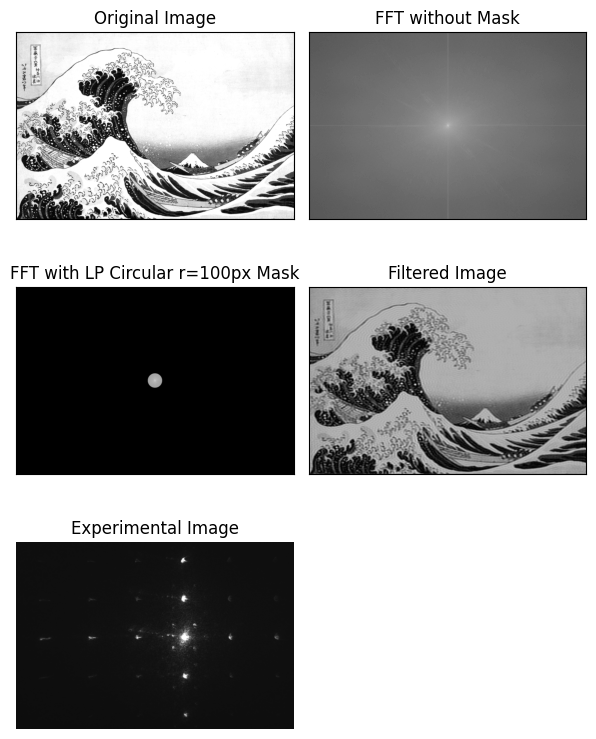

In [17]:
img = cv2.imread('Mintzer and Algherbawi/GreatWaveOffKanagawa.bmp',0)
exp_img = cv2.imread('Mintzer and Algherbawi/5. 2f system.200mm lens great wave low pass circular filter .jpg', 0)  # Grayscale
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize
exp_img = cv2.resize(exp_img, img.shape[::-1])

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

#Create copy of fshift
fshift_original = fshift.copy()

radius_inner = 0
radius_outer = 100
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
Y, X = np.ogrid[:rows, :cols]
distance = (X - ccol)**2 + (Y - crow)**2

mask = np.zeros((rows, cols), np.uint8)
mask[(distance >= radius_inner**2) & (distance <= radius_outer**2)] = 1

# Apply mask
fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# FFT magnitude images (log-scaled for visibility)
magnitude_original = 20 * np.log(np.abs(fshift_original) + 1)
magnitude_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)

# Plot
plt.figure(figsize=(6, 8))

plt.subplot(321), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(magnitude_original, cmap='gray')
plt.title('FFT without Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(magnitude_filtered, cmap='gray')
plt.title('FFT with LP Circular r=100px Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(324), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('5.3 LP Circular Great Wave.png', dpi=800)
plt.show()

#### High-Pass Vertical Filter

#### Cat

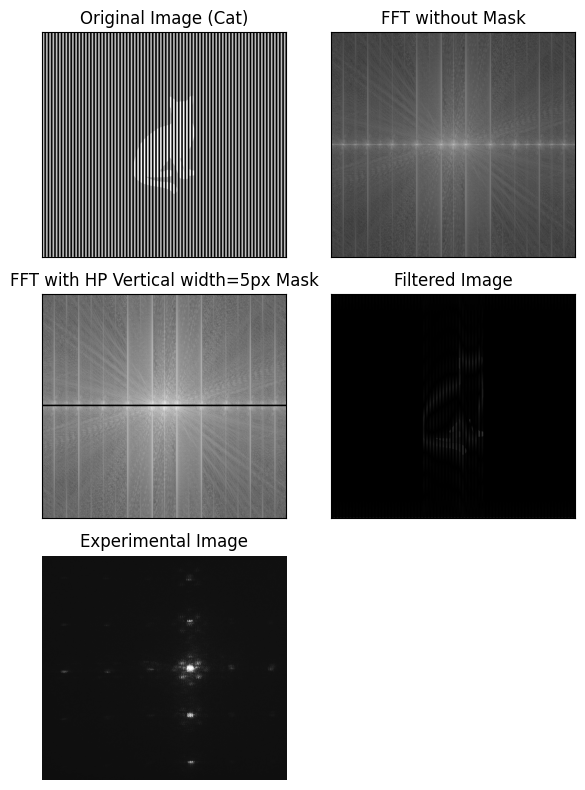

In [9]:
img = cv2.imread('Mintzer and Algherbawi/Cat.bmp',0)
exp_img = cv2.imread('Mintzer and Algherbawi/5. 2f system.200mm lens cat high pass vertical filter 20.jpg', 0)  # Grayscale
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize
exp_img = cv2.resize(exp_img, img.shape[::-1])

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

#Create copy of fshift
fshift_original = fshift.copy()

# Get image center
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Vertical high-pass mask
mask = np.ones((rows, cols), np.uint8)
vertical_band = 5  # Controls width of suppressed vertical band (adjust as needed)

# Block the horizontal band centered at the vertical axis
mask[crow - vertical_band:crow + vertical_band, :] = 0

# Apply mask
fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# FFT magnitude images (log-scaled for visibility)
magnitude_original = 20 * np.log(np.abs(fshift_original) + 1)
magnitude_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)

# Plot
plt.figure(figsize=(6, 8))

plt.subplot(321), plt.imshow(img, cmap='gray')
plt.title('Original Image (Cat)'), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(magnitude_original, cmap='gray')
plt.title('FFT without Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(magnitude_filtered, cmap='gray')
plt.title('FFT with HP Vertical width=5px Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(324), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('5.3 HP Vertical Cat.png', dpi=800)
plt.show()

## 6 Holography with SLMs

• Implement your own Gerchberg-Saxton algorithm (see Wikipedia for
an easy pseudo code implementation. e.g. https://en.wikipedia.org/wiki/Phase_retrievall and https://en.wikipedia.org/wiki/Gerchberg%E2%80%93Saxton_algorithm ) and estimate the error reduction for each subsequent iteration of the algorithm.

• Describe differences between your recorded images and the ones you get
from inverse transforming the phase you get from the Gerchberg-Saxton
algorithm.

#### Fractal 2.4

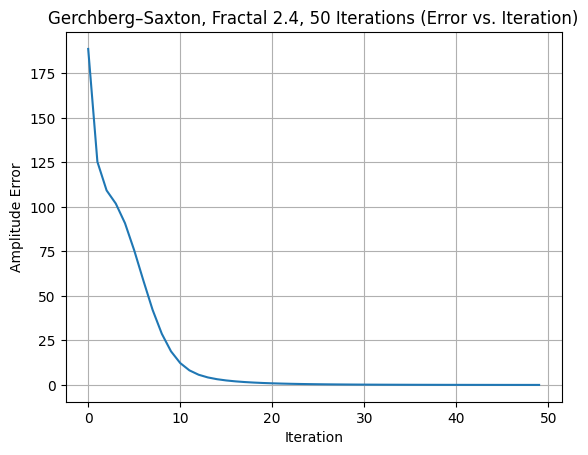

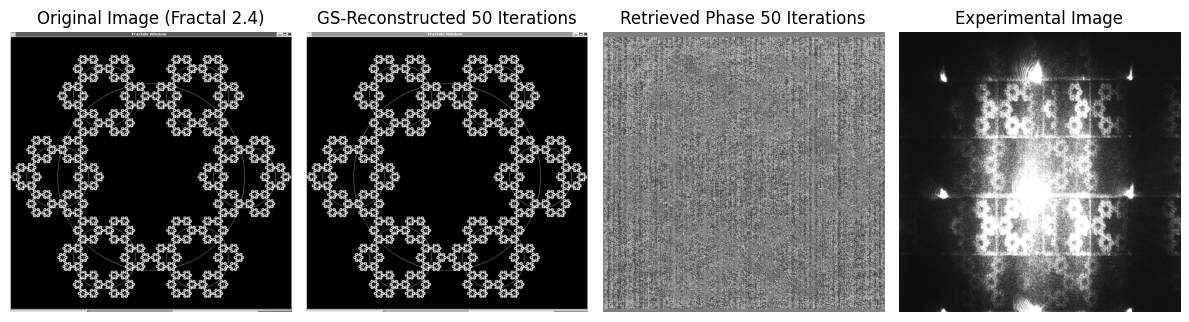

In [3]:
# Load input image and normalize
img = cv2.imread('Mintzer and Algherbawi/fractal_2.4.png', 0).astype(np.float32) / 255.0
exp_img = cv2.imread('Mintzer and Algherbawi/6 Holography fractal_2.4 No Prism X -330Y Y -259 Z 0 Iterations 10 .jpg', 0)  # Grayscale
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize
exp_img = cv2.resize(exp_img, img.shape[::-1])

if img is None:
    raise FileNotFoundError("Image not found. Check the path to 'Cat.bmp'")

Source = np.sqrt(img)  # Spatial amplitude constraint

# Fourier amplitude constraint (target)
Target = np.abs(np.fft.fft2(Source))

# Step 1: A := IFT(Target)
A = np.fft.ifft2(Target)  # This uses default zero phase (real-valued)

# For error tracking
errors = []
iterations = 50

for i in range(iterations):
    # B := Amplitude(Source) * exp(i * Phase(A))
    B = Source * np.exp(1j * np.angle(A))

    # C := FT(B)
    C = np.fft.fft2(B)

    # D := Amplitude(Target) * exp(i * Phase(C))
    D = Target * np.exp(1j * np.angle(C))

    # A := IFT(D)
    A = np.fft.ifft2(D)

    # Optional: track amplitude error in spatial domain
    err = np.linalg.norm(np.abs(A) - Source)
    errors.append(err)

# Final output
Retrieved_Phase = np.angle(A)
Reconstructed = np.abs(A)

plt.plot(errors)
plt.title("Gerchberg–Saxton, Fractal 2.4, 50 Iterations (Error vs. Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Amplitude Error") #(L2 norm)
plt.grid(True)
plt.savefig('6 GS 50 Iteration Error Plot Fractal 2.4.png', dpi=800)
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image (Fractal 2.4)")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(Reconstructed, cmap='gray')
plt.title("GS-Reconstructed 50 Iterations")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(Retrieved_Phase, cmap='gray')
plt.title("Retrieved Phase 50 Iterations")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')
plt.tight_layout()
plt.savefig('6 GS 50 Iteration Fractal 2.4.png', dpi=800)
plt.show()

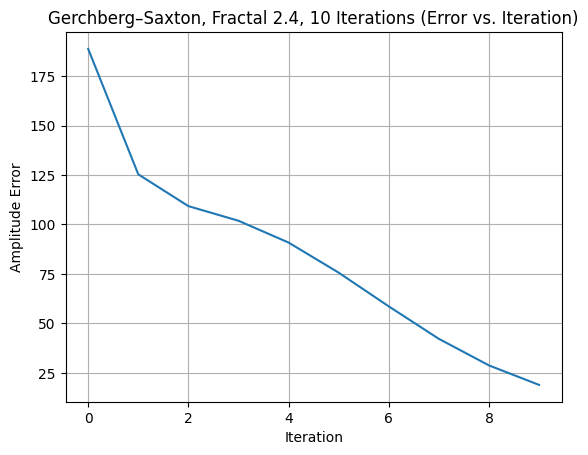

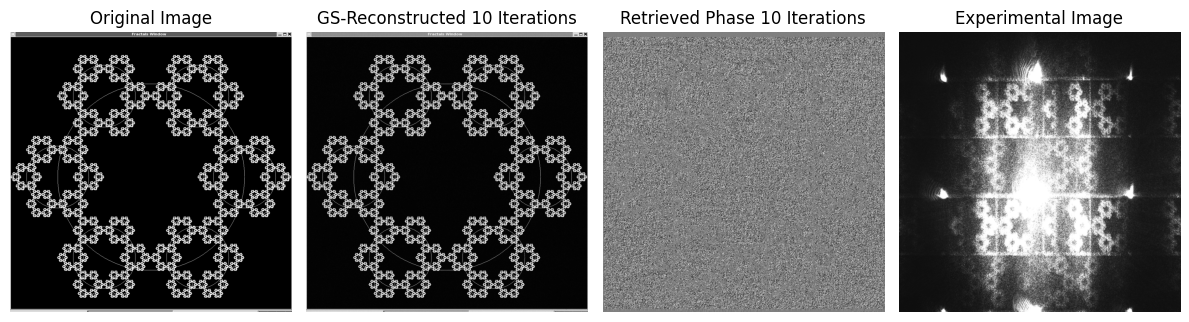

In [2]:
# Load input image and normalize
img = cv2.imread('Mintzer and Algherbawi/fractal_2.4.png', 0).astype(np.float32) / 255.0
exp_img = cv2.imread('Mintzer and Algherbawi/6 Holography fractal_2.4 No Prism X -330Y Y -259 Z 0 Iterations 10 .jpg', 0)  # Grayscale
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize
exp_img = cv2.resize(exp_img, img.shape[::-1])

if img is None:
    raise FileNotFoundError("Image not found. Check the path to 'Cat.bmp'")

Source = np.sqrt(img)  # Spatial amplitude constraint

# Fourier amplitude constraint (target)
Target = np.abs(np.fft.fft2(Source))

# Step 1: A := IFT(Target)
A = np.fft.ifft2(Target)  # This uses default zero phase (real-valued)

# For error tracking
errors = []
iterations = 10

for i in range(iterations):
    # B := Amplitude(Source) * exp(i * Phase(A))
    B = Source * np.exp(1j * np.angle(A))

    # C := FT(B)
    C = np.fft.fft2(B)

    # D := Amplitude(Target) × exp(i * Phase(C))
    D = Target * np.exp(1j * np.angle(C))

    # A := IFT(D)
    A = np.fft.ifft2(D)

    # Optional: track amplitude error in spatial domain
    err = np.linalg.norm(np.abs(A) - Source)
    errors.append(err)

# Final output
Retrieved_Phase = np.angle(A)
Reconstructed = np.abs(A)

plt.plot(errors)
plt.title("Gerchberg–Saxton, Fractal 2.4, 10 Iterations (Error vs. Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Amplitude Error") #(L2 norm)
plt.grid(True)
plt.savefig('6 GS 10 Iteration Error Plot Fractal 2.4.png', dpi=800)
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(Reconstructed, cmap='gray')
plt.title("GS-Reconstructed 10 Iterations")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(Retrieved_Phase, cmap='gray')
plt.title("Retrieved Phase 10 Iterations")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('6 GS 10 Iteration Fractal 2.4.png', dpi=800)
plt.show()

#### Lenna

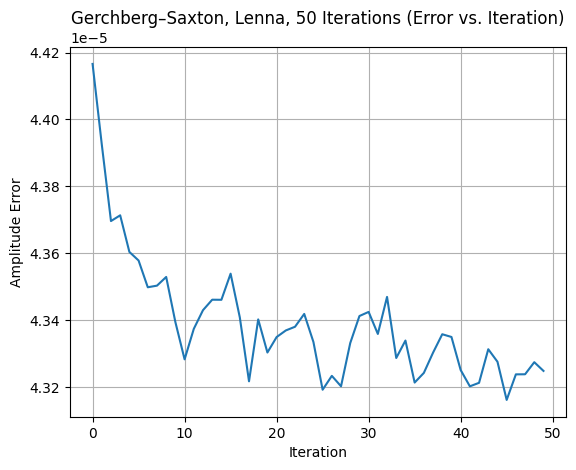

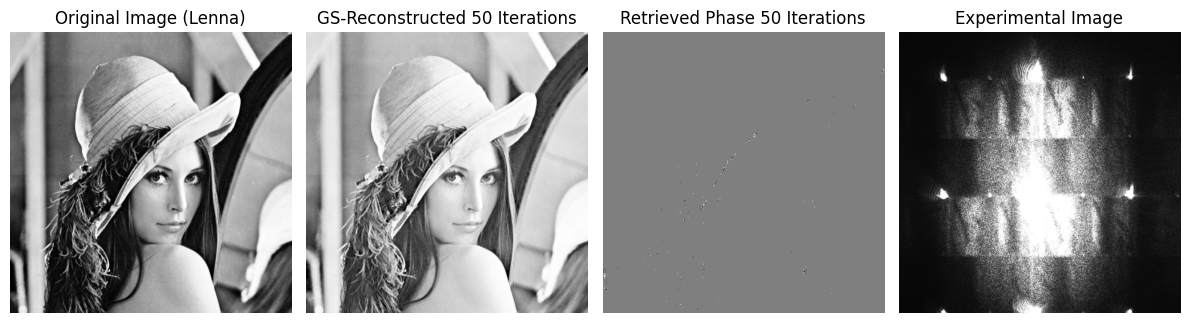

In [12]:
# Load input image and normalize
img = cv2.imread('Mintzer and Algherbawi/Lenna_(test_image).bmp', 0).astype(np.float32) / 255.0
exp_img = cv2.imread('Mintzer and Algherbawi/6 Holography Lena No Prism 198 X  Z 0 Iterations 10.jpg', 0)  # Grayscale
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize
exp_img = cv2.resize(exp_img, img.shape[::-1])

if img is None:
    raise FileNotFoundError("Image not found. Check the path to 'Cat.bmp'")

Source = np.sqrt(img)  # Spatial amplitude constraint

# Fourier amplitude constraint (target)
Target = np.abs(np.fft.fft2(Source))

# Step 1: A := IFT(Target)
A = np.fft.ifft2(Target)  # This uses default zero phase (real-valued)

# For error tracking
errors = []
iterations = 50

for i in range(iterations):
    # B := Amplitude(Source) * exp(i * Phase(A))
    B = Source * np.exp(1j * np.angle(A))

    # C := FT(B)
    C = np.fft.fft2(B)

    # D := Amplitude(Target) * exp(i * Phase(C))
    D = Target * np.exp(1j * np.angle(C))

    # A := IFT(D)
    A = np.fft.ifft2(D)

    # Optional: track amplitude error in spatial domain
    err = np.linalg.norm(np.abs(A) - Source)
    errors.append(err)

# Final output
Retrieved_Phase = np.angle(A)
Reconstructed = np.abs(A)

plt.plot(errors)
plt.title("Gerchberg–Saxton, Lenna, 50 Iterations (Error vs. Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Amplitude Error") #(L2 norm)
plt.grid(True)
plt.savefig('6 GS 50 Iteration Error Plot Lenna.png', dpi=800)
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image (Lenna)")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(Reconstructed, cmap='gray')
plt.title("GS-Reconstructed 50 Iterations")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(Retrieved_Phase, cmap='gray')
plt.title("Retrieved Phase 50 Iterations")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('6 GS 50 Iteration Lenna.png', dpi=800)
plt.show()

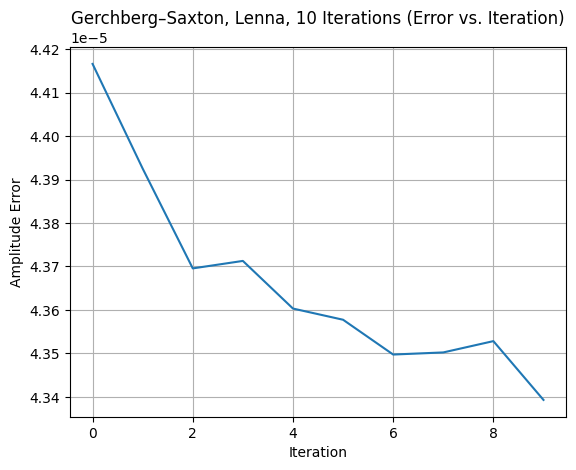

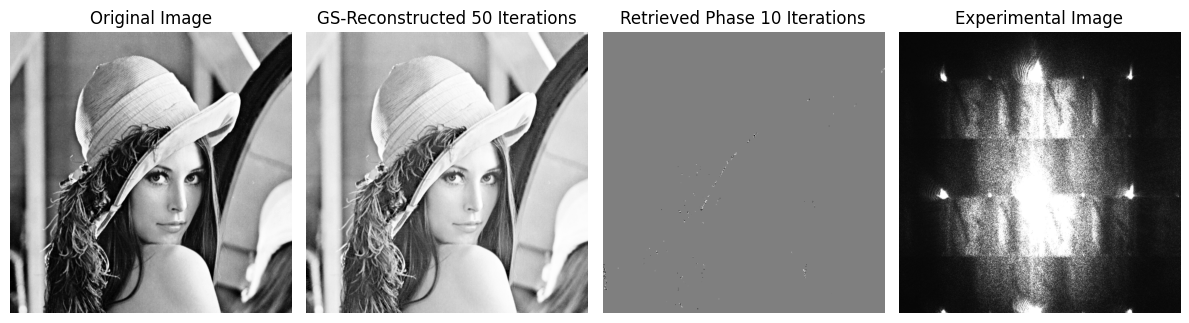

In [13]:
# Load input image and normalize
img = cv2.imread('Mintzer and Algherbawi/Lenna_(test_image).bmp', 0).astype(np.float32) / 255.0
exp_img = cv2.imread('Mintzer and Algherbawi/6 Holography Lena No Prism 198 X  Z 0 Iterations 10.jpg', 0)  # Grayscale
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize
exp_img = cv2.resize(exp_img, img.shape[::-1])

if img is None:
    raise FileNotFoundError("Image not found. Check the path to 'Cat.bmp'")

Source = np.sqrt(img)  # Spatial amplitude constraint

# Fourier amplitude constraint (target)
Target = np.abs(np.fft.fft2(Source))

# Step 1: A := IFT(Target)
A = np.fft.ifft2(Target)  # This uses default zero phase (real-valued)

# For error tracking
errors = []
iterations = 10

for i in range(iterations):
    # B := Amplitude(Source) * exp(i * Phase(A))
    B = Source * np.exp(1j * np.angle(A))

    # C := FT(B)
    C = np.fft.fft2(B)

    # D := Amplitude(Target) * exp(i * Phase(C))
    D = Target * np.exp(1j * np.angle(C))

    # A := IFT(D)
    A = np.fft.ifft2(D)

    # Optional: track amplitude error in spatial domain
    err = np.linalg.norm(np.abs(A) - Source)
    errors.append(err)

# Final output
Retrieved_Phase = np.angle(A)
Reconstructed = np.abs(A)

plt.plot(errors)
plt.title("Gerchberg–Saxton, Lenna, 10 Iterations (Error vs. Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Amplitude Error") #(L2 norm)
plt.grid(True)
plt.savefig('6 GS 10 Iteration Error Plot Lenna.png', dpi=800)
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(Reconstructed, cmap='gray')
plt.title("GS-Reconstructed 50 Iterations")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(Retrieved_Phase, cmap='gray')
plt.title("Retrieved Phase 10 Iterations")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('6 GS 10 Iteration Lenna.png', dpi=800)
plt.show()

### Scrap Code

##### High-Pass Vertical Filter

#### Humboldt

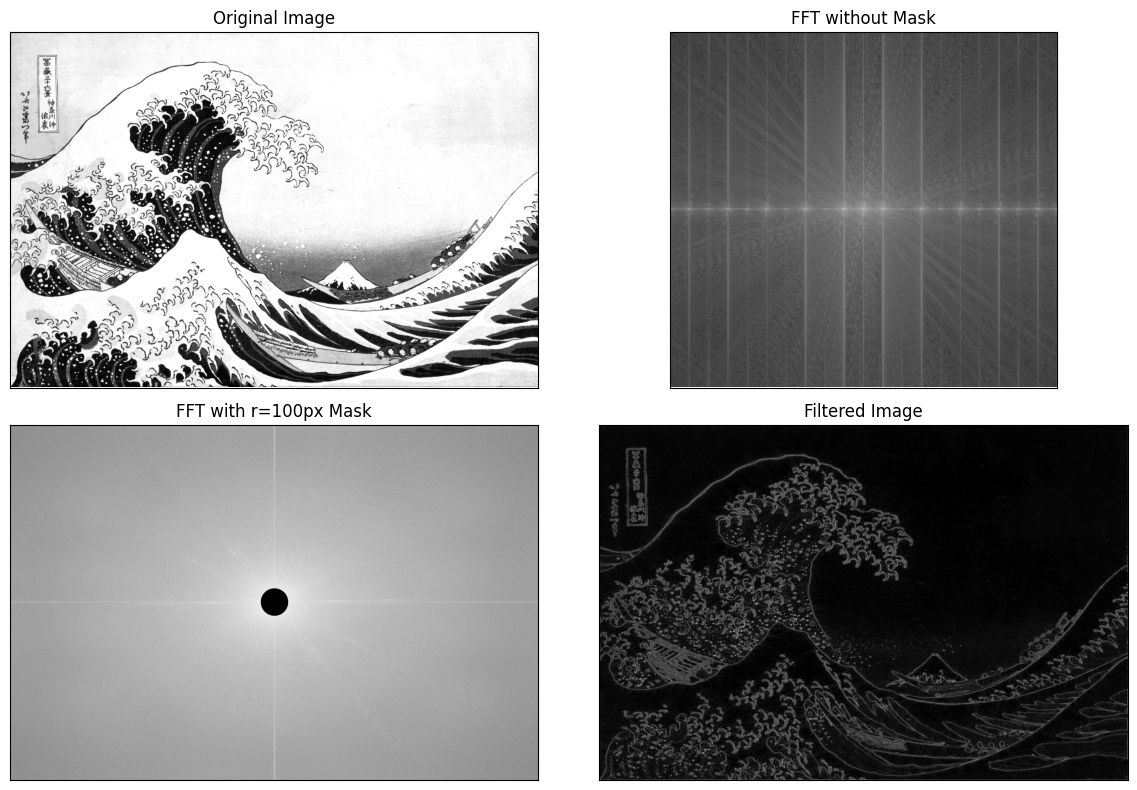

In [14]:
#Create copy of fshift
#fshift_original = fshift.copy()

img = cv2.imread('Mintzer and Algherbawi/GreatWaveOffKanagawa.bmp',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

#Create Cirular Mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
radius = 100

#fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

mask = np.ones((rows, cols), np.uint8)
Y, X = np.ogrid[:rows, :cols]
distance = (X - ccol)**2 + (Y - crow)**2
mask[distance <= radius**2] = 0

# Implement Mask
fshift_filtered = fshift * mask

# Inverse FFT
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# FFT magnitude images (log-scaled for visibility)
magnitude_original = 20 * np.log(np.abs(fshift_original) + 1)
magnitude_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)

# Plot
plt.figure(figsize=(12, 8))

plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(magnitude_original, cmap='gray')
plt.title('FFT without Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(magnitude_filtered, cmap='gray')
plt.title('FFT with r=100px Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

##### High-Pass Circular Filter

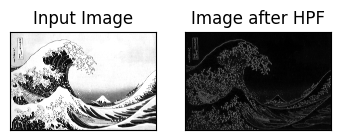

In [15]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
radius = 100

fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

mask = np.ones((rows, cols), np.uint8)
Y, X = np.ogrid[:rows, :cols]
distance = (X - ccol)**2 + (Y - crow)**2
mask[distance <= radius**2] = 0

fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(img_back)
# plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()